In [141]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
#load the dataset...
df = pd.read_csv('amazon_cells_labelled.txt', sep="\t", header=None)
df.columns = ['text', 'sentiment']

df.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [143]:
#df of positive movies
positive_df = df.loc[movie_df.sentiment == 1].reset_index()
#create a dictionary of positive words
words = {}

for i in range(len(positive_df.text)):
    sentence = positive_df.text[i].split(' ')
    for j in range(len(sentence)):
        if (sentence[j].lower() in words):
            words[sentence[j].lower()] += 1
        else:
            words.update({sentence[j].lower() : 1})

In [144]:
#a list of all the positive word counts
values = []
for i in words:
    values.append(words[i])
#iterate and find the highest used words
for word in words:
    if (words[word] > np.percentile(values, 92)):
        print('{} : {}'.format(word, round(words[word] / len(words) * 100, 2)))

good : 3.68
excellent : 1.39
great : 4.31
for : 4.51
the : 16.46
is : 9.65
great. : 1.04
you : 1.39
are : 1.46
have : 2.57
and : 13.06
sound : 1.53
quality : 1.46
was : 2.5
very : 4.79
when : 0.49
from : 1.11
battery : 1.39
to : 5.9
highly : 0.56
recommend : 1.25
any : 1.04
one : 1.53
has : 1.67
a : 7.22
phone. : 1.39
so : 1.81
works : 2.99
i : 10.49
bought : 0.56
this : 6.94
use : 0.9
with : 4.31
my : 5.0
new : 0.69
without : 0.49
phone : 3.96
i've : 1.32
can : 0.76
that : 2.08
it's : 1.11
best : 1.32
product : 1.04
like : 1.25
car : 0.56
as : 1.39
well : 1.18
of : 3.4
it : 7.5
up : 0.76
well. : 0.83
case : 0.49
camera : 0.49
nice : 1.32
clear : 0.49
quality. : 0.56
headset : 1.67
bluetooth : 0.69
all : 1.18
does : 0.49
not : 0.97
just : 0.83
pretty : 0.56
had : 1.18
it. : 0.9
love : 1.39
about : 0.49
price : 0.76
even : 0.76
been : 0.83
happy : 0.9
no : 0.83
on : 2.99
really : 1.04
these : 0.83
- : 0.97
they : 0.62
in : 2.36
comfortable : 0.76
than : 1.32
because : 0.62
device : 0.49

In [145]:
keywords = ['good', 'great', 'very', 'excellent', 'best', 'recommend', 'quality', 'love', 'easy', 'happy']

#create columns based on the presence of our keywords
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not the pattern
    df[str(key)] = df.text.str.contains(str(key), case=False)

In [146]:
#turn our 0 and 1's into true and false...DON'T RUN AGAIN!!!
df.sentiment = (df.sentiment == 1)

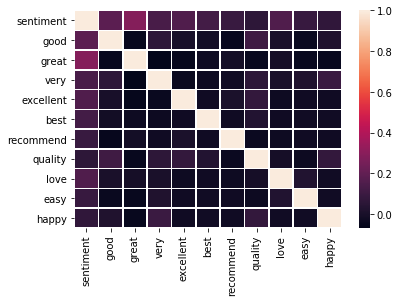

In [147]:
sns.heatmap(df.corr(), linewidth=0.5)
plt.show()

Ok, this seems like there aren't many correlations between our features. Let's see how accurate we are!

In [148]:
data = df[keywords]
target = df['sentiment']

In [149]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 265


In [150]:
#percent accuracy
print('Our model is {}% accurate'.format(100 - (target != y_pred).sum() / data.shape[0] * 100, 2))

Our model is 73.5% accurate


In [151]:
df2 = pd.read_csv('imdb_labelled.txt', sep="\t", header=None)
df2.columns = ['text', 'sentiment']

df.head()

,text,sentiment,good,great,very,excellent,best,recommend,quality,love,easy,happy
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,True,False,False,True,False,False,False,False,False,False
2,Great for the jawbone.,True,False,True,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,True,False,False,False,False,False,False,False,False


In [152]:
keywords = ['good', 'great', 'very', 'excellent', 'best', 'recommend', 'quality', 'love', 'easy', 'happy']

#create columns based on the presence of our keywords
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not the pattern
    df2[str(key)] = df2.text.str.contains(str(key), case=False)

In [153]:
#turn our 0 and 1's into true and false...DON'T RUN AGAIN!!!
df2.sentiment = (df2.sentiment == 1)

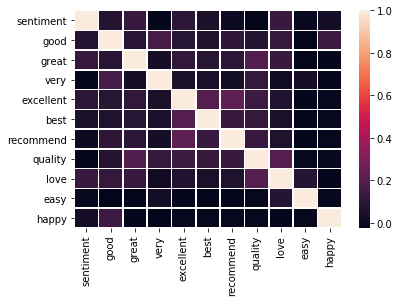

In [159]:
sns.heatmap(df2.corr(), linewidth=0.5)
plt.show()

In [160]:
data = df2[keywords]
target = df2['sentiment']

In [161]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 314


In [162]:
#percent accuracy
print('Our model is {}% accurate'.format(100 - (target != y_pred).sum() / data.shape[0] * 100, 2))

Our model is 58.02139037433155% accurate


In [163]:
#percent accuracy
print('Our model is {}% accurate'.format(100 - (target != y_pred).sum() / data.shape[0] * 100, 2))

Our model is 58.02139037433155% accurate
